# Seaborn and Linear regression

Regressions are useful to understand relationships between two continuous variables. We can use seaborn is to fit and visualize a simple linear regression between two variables using `sns.lmplot()`.

One difference between seaborn and regular matplotlib plotting is that you can pass pandas DataFrames directly to the plot and refer to each column by name. For example, if you were to plot the column 'price' vs the column 'area' from a DataFrame df, you could call

`sns.lmplot(x='area', y='price', data=df)`.

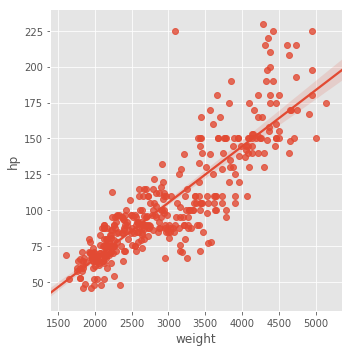

In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


auto = pd.read_csv('./data/auto.csv')

# Plot a linear regression between 'weight' and 'hp'
sns.lmplot(x='weight', y='hp', data=auto)

plt.style.use('ggplot')
plt.show()


Often, you don't just want to see the regression itself but also see the residuals to get a better idea how well the regression captured the data. Seaborn provides `sns.residplot()` for that purpose, visualizing how far datapoints diverge from the regression line.

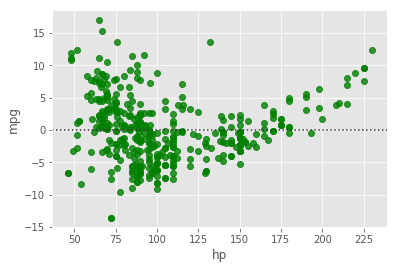

In [2]:
# Generate a green residual plot of the regression between 'hp' and 'mpg'
sns.residplot(x='hp', y='mpg', data=auto, color='green')

# Display the plot
plt.show()

You can use Seaborn to plot and visualize regressions of varying orders. 

We can plot a second order regression between the horse power ('hp') and miles per gallon ('mpg') using `sns.regplot()`. The function `sns.lmplot()` is a higher-level interface to `sns.regplot()`. However, before plotting this relationship, compare how the residual changes depending on the order of the regression. Does a second order regression perform significantly better than a simple linear regression?

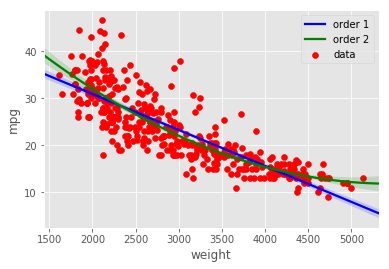

In [5]:
# Generate a scatter plot of 'weight' and 'mpg' using red circles
plt.scatter(auto['weight'], auto['mpg'], label='data', color='red', marker='o')

# Plot a linear regression line of 'order 1' between 'weight' and 'mpg' in 'blue' without the scatter points.
# You need to specify the label and color parameters, in addition to scatter=None
sns.regplot(x='weight', y='mpg', data=auto, scatter=None, color='blue', label='order 1')

# Plot a linear regression line of 'order 2' between 'weight' and 'mpg' in 'green' without the scatter points.
# To force a higher order regression, you need to specify the order parameter. Here, it should be 2.
sns.regplot(x='weight', y='mpg', data=auto, scatter=None, order=2, color='green', label='order 2')

# Add a legend and display the plot
plt.legend(loc='upper right')
plt.show()

Often it is useful to compare and contrast trends between different groups. Seaborn makes it possible to apply linear regressions separately for subsets of the data by applying a groupby operation. Using the hue argument, you can specify a categorical variable by which to group data observations. The distinct groups of points are used to produce distinct regressions with different hues in the plot.

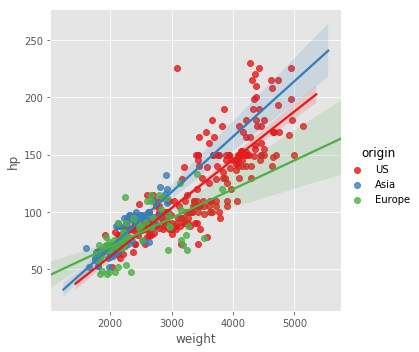

In [7]:
# Plot a linear regression between 'weight' and 'hp', with a hue of 'origin' and palette of 'Set1'
sns.lmplot(x='weight', y='hp', data=auto, hue='origin', palette='Set1')
# Display the plot
plt.show()

Rather than overlaying linear regressions of grouped data in the same plot, we may want to use a grid of subplots. The `sns.lmplot()` accepts the arguments `row` and/or `col` to arrangements of subplots for regressions.

We can use the keyword argument `row` to display the subplots organized in rows. we can plot horsepower vs. weight regressions grouped by continent of origin in separate subplots stacked vertically.

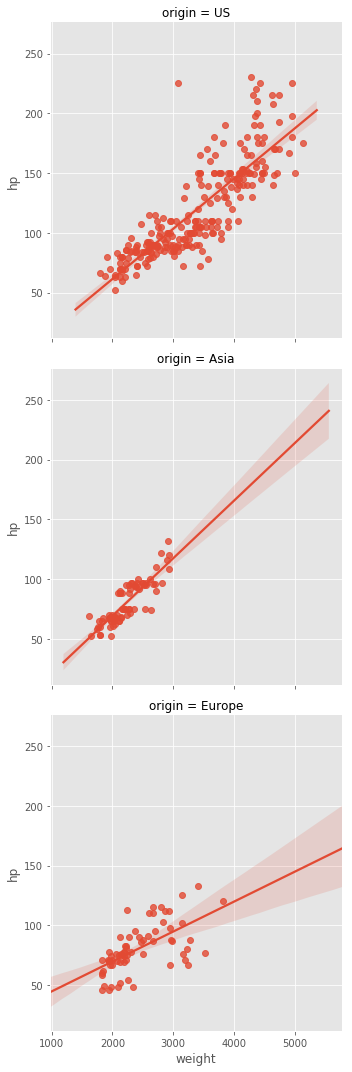

In [10]:
# Plot linear regressions between 'weight' and 'hp' grouped row-wise by 'origin'
sns.lmplot(x='weight', y='hp', data=auto, row='origin')

# Display the plot
plt.show()